## **** inform indicates the cell is informational.

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

sqlalchemy.__version__

'1.3.20'

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement_tbl = Base.classes.measurement
Station_tbl = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

session

### **** Use inspect to view the table names and columns


In [10]:
# **** show table names and column names
from sqlalchemy import inspect

# Create the inspector and connect it to the engine
inspector = inspect(engine)

for table_name in inspector.get_table_names():
   print(f"Table name: {table_name}") 

   for column in inspector.get_columns(table_name):
       print("Column: %s  %s" % (column['name'], column['type']))
    
   print() 

Table name: measurement
Column: id  INTEGER
Column: station  TEXT
Column: date  TEXT
Column: prcp  FLOAT
Column: tobs  FLOAT

Table name: station
Column: id  INTEGER
Column: station  TEXT
Column: name  TEXT
Column: latitude  FLOAT
Column: longitude  FLOAT
Column: elevation  FLOAT



### **** sqlalchemy to show the rows of Station_tbl

In [11]:
# ****
station_list = []
name_list = []
lat_list = []
long_list = []
elev_list = []

result = session.query(Station_tbl).all()

for row in result:
   #print ("Station:",row.station, "Name:",row.name, "Latitude:",row.latitude)

    station_list.append(row.station)
    name_list.append(row.name)
    lat_list.append(row.latitude)
    long_list.append(row.longitude)
    elev_list.append(row.elevation)
    
station_df = pd.DataFrame({
    "station": station_list,
    "name": name_list,
    "latitude": lat_list,
    "longitude": long_list, 
    "elevation": elev_list
})    
    
station_df

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


### **** sqlite3 to show the column names of table measurement & station

In [12]:
# ****
import sqlite3
conn = sqlite3.connect('hawaii.sqlite')
cursor = conn.execute('select * from measurement')
cursor.description


(('id', None, None, None, None, None, None),
 ('station', None, None, None, None, None, None),
 ('date', None, None, None, None, None, None),
 ('prcp', None, None, None, None, None, None),
 ('tobs', None, None, None, None, None, None))

In [13]:
# ****

#names = [description[0] for description in cursor.description]
names = list(map(lambda x: x[0], cursor.description))

names

['id', 'station', 'date', 'prcp', 'tobs']

In [14]:
# ****
for column_name in cursor.description:
    print(column_name[0])

id
station
date
prcp
tobs


### **** Pandas to show the column names and observations

In [15]:
# ****
measurement_df = pd.read_sql(
    "SELECT * FROM measurement limit 1",
    con=engine,
    parse_dates=[
        'date'
    ]
)

measurement_df

measurement_df.head(2)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0


In [16]:
# ****
for column_name in measurement_df:
    print(column_name)

id
station
date
prcp
tobs


In [17]:
# ****
station_df = pd.read_sql(
    "SELECT count(distinct(st.station)) as 'Available Stations' FROM station as st",
    con=engine
)

station_df

,Available Stations
0,9


# Exploratory Climate Analysis

In [18]:
MaxDate = engine.execute("SELECT MAX(date) FROM Measurement").fetchall()
MaxDate[0][0]

# MaxDate_df = pd.read_sql(
#     "SELECT MAX(date) FROM Measurement",
#     con=engine
# )

# MaxDate_df

'2017-08-23'

In [19]:
MaxDate = engine.execute("SELECT MAX(date) FROM Measurement").first()
print(MaxDate[0])

type(MaxDate[0])

2017-08-23


str

In [20]:
# ****
# Get the latest date
MaxDate = engine.execute("SELECT MAX(date) FROM Measurement").fetchall()
EndDate = MaxDate[0][0]

Year = int(EndDate[0:4])
Month = int(EndDate[5:7])
Day = int(EndDate[8:])

StartDate = dt.date(Year, Month, Day) - dt.timedelta(days=365)
print(f"The last 12 months are from {StartDate} to {EndDate}")

The last 12 months are from 2016-08-23 to 2017-08-23


In [21]:
sql = "SELECT date, prcp FROM measurement where date <= \"" + str(EndDate) + "\" and date >= '"

sql

'SELECT date, prcp FROM measurement where date <= "2017-08-23" and date >= \''

In [22]:
# ****
station_df = pd.read_sql(
    "SELECT date, prcp FROM measurement where date <= \"" + str(EndDate) + "\" and date >= '" + str(StartDate) + "' order by date desc",
    con=engine
)

station_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [23]:
# ****
# Retrieve the last 12 months of precipitation data
prcp_data = session.query(Measurement_tbl.date,Measurement_tbl.prcp)\
                          .filter(Measurement_tbl.date <= EndDate)\
                          .filter(Measurement_tbl.date >= StartDate)\
                          .order_by(Measurement_tbl.date.desc()).all()
#for data in PRCP_data: 
#     print(data)

# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df = pd.DataFrame(prcp_data).rename(columns={"date":"Date","prcp":"Precipitation"})
prcp_df.set_index("Date",inplace=True)
prcp_df.head(2)

,Precipitation
Date,
2017-08-23,0.0
2017-08-23,0.0


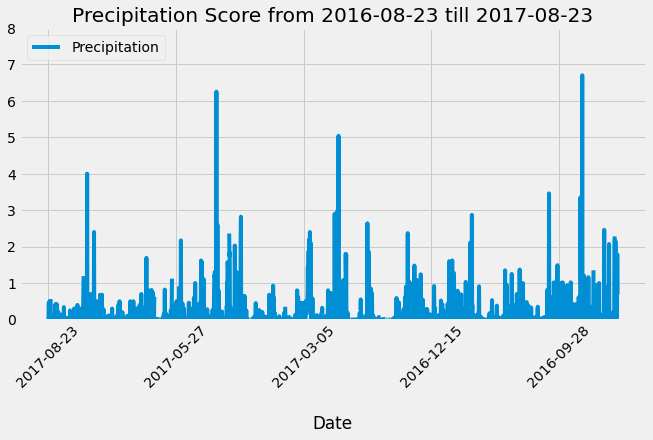

In [24]:
# Plot the results using the DataFrame plot method
prcp_df.plot(figsize=(10,5),ylim=(0,8),title=f'Precipitation Score from {StartDate} till {EndDate}',\
                  label="Precipitation",rot=45)
plt.legend(loc="upper left")
plt.xlabel("\nDate")
#plt.savefig("Precipitation_Analysis.jpg")
plt.show()

Text(0, 0.5, 'Inches')

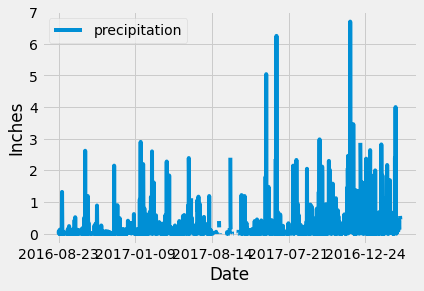

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement_tbl.date, Measurement_tbl.prcp).filter(Measurement_tbl.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['time_stamp', 'precipitation'])
df.set_index(df['time_stamp'], inplace=True)

# Sort the dataframe by date
#df = df.sort_values(by="time_stamp")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xlabel("Date")
plt.ylabel("Inches")

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
# Design a query to show how many stations are available in this dataset?

#session.query(func.count(Station_tbl.station)).all()

# stations = engine.execute("SELECT count(station) FROM station").fetchall()
# stations[0][0]

stations = session.query(Station_tbl).count()
print(f'Total number of stations is: {stations}')

Total number of stations is: 9


In [28]:
# ****
station_df = pd.read_sql(
    "SELECT count(distinct(station)) as 'Available Stations' FROM station as st",
    con=engine
)

station_df

,Available Stations
0,9


In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement_tbl.station, func.count(Measurement_tbl.station)).\
    group_by(Measurement_tbl.station).order_by(func.count(Measurement_tbl.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# ****
Stations_desc = session.query(Measurement_tbl.station, func.count(Measurement_tbl.station)).\
    group_by(Measurement_tbl.station).order_by(func.count(Measurement_tbl.station).desc()).all()

#for station in Stations_desc: 
     #print(station)
        
print("Rank\t Station ID\t observation counts")
i = 1
for active_stations in Stations_desc:
    print("%d\t %s\t %d" %(i,active_stations[0],active_stations[1]))
    
    if i==1:
        station = active_stations[0]
        observation = active_stations[1]
    i+=1

print()
print(f"{station} station has the highest number of observations {observation}.")

# Stations_desc = session.query(Measurement_tbl.station, func.count(Measurement_tbl.station)).\
#     group_by(Measurement_tbl.station).order_by(func.count(Measurement_tbl.station).desc()).first()

# Stations_desc[1]

Rank	 Station ID	 observation counts
1	 USC00519281	 2772
2	 USC00519397	 2724
3	 USC00513117	 2709
4	 USC00519523	 2669
5	 USC00516128	 2612
6	 USC00514830	 2202
7	 USC00511918	 1979
8	 USC00517948	 1372
9	 USC00518838	 511

USC00519281 station has the highest number of observations 2772.


In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Station = session.query(Measurement_tbl.station, func.count(Measurement_tbl.station)).\
    group_by(Measurement_tbl.station).order_by(func.count(Measurement_tbl.station).desc()).first()

Stations_temp = session.query(func.min(Measurement_tbl.tobs), func.max(Measurement_tbl.tobs), func.avg(Measurement_tbl.tobs)).\
    filter(Measurement_tbl.station == 'USC00519281').all()

print(f"The most active station is {Station[0]} with its lowest temperature, highest temperature, and average temperature.")
print()
print("Lowest   Highest  Average")

for temp in Stations_temp:
    print("---------------------------")
    print(f"{round(temp[0],2)}     {round(temp[1],2)}     {round(temp[2],2)}")

The most active station is USC00519281 with its lowest temperature, highest temperature, and average temperature.

Lowest   Highest  Average
---------------------------
54.0     85.0     71.66


Text(0.5, -1.340000000000014, 'Temperature')

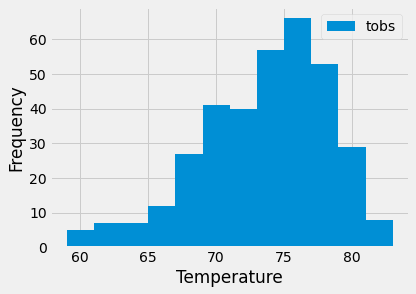

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement_tbl.tobs).\
    filter(Measurement_tbl.station == 'USC00519281').\
    filter(Measurement_tbl.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

## Bonus Challenge Assignment

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement_tbl.tobs), func.avg(Measurement_tbl.tobs), \
        func.max(Measurement_tbl.tobs)).filter(Measurement_tbl.date >= start_date).\
        filter(Measurement_tbl.date <= end_date).all()

calc_temps("2017-01-01", "2017-01-10")

[(60.0, 68.0327868852459, 77.0)]

In [34]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
import datetime as dt

prev_year_start = dt.date(2018, 1, 1) - dt.timedelta(days=365)
prev_year_end = dt.date(2018, 1, 7) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]

print(f"{tmin}, {tavg:.2f}, {tmax}")

calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))

62.0, 68.37, 74.0


[(62.0, 68.36585365853658, 74.0)]

In [35]:
# ****
# **** Enter the trip start date in 'YYYY-MM-DD' format: 2018-01-01
# **** Enter the trip end date in 'YYYY-MM-DD' format: 2018-01-10    
start_date = input("Enter the trip start date in 'YYYY-MM-DD' format: ")
end_date = input("Enter the trip end date in 'YYYY-MM-DD' format: ")

print()
prev_start_date = start_date
Trip_end_date = end_date

Year = int(start_date[0:4])
Month = int(start_date[5:7])
Day = int(start_date[8:])
prev_start_date = dt.date(Year, Month, Day) - dt.timedelta(days=365)

Year = int(end_date[0:4])
Month = int(end_date[5:7])
Day = int(end_date[8:])
prev_end_date = dt.date(Year, Month, Day) - dt.timedelta(days=365)

t = calc_temps(prev_start_date, prev_end_date)

print(f"The lowest, highest and average temperatures for the previous trip between {prev_start_date} and {prev_end_date}.")
print()
print("Lowest   Highest  Average")

for temp in Stations_temp:
    print("---------------------------")
    print(f"{round(t[0][0],2)}     {round(t[0][1],2)}     {round(t[0][2],2)}")

Enter the trip start date in 'YYYY-MM-DD' format: 2018-01-01
Enter the trip end date in 'YYYY-MM-DD' format: 2018-01-10

The lowest, highest and average temperatures for the previous trip between 2017-01-01 and 2017-01-10.

Lowest   Highest  Average
---------------------------
60.0     68.03     77.0


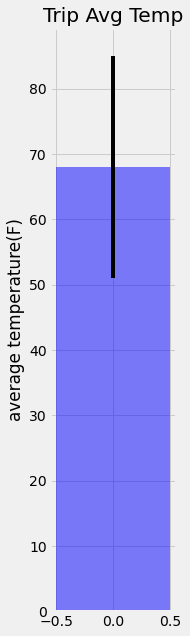

In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tmin = t[0][0]
tavg = t[0][1]
tmax = t[0][2]
yerr = tmax-tmin

plt.figure(figsize=(2,10))
plt.bar(0,tavg,yerr=yerr,align="center",width=1,color="blue",alpha=0.5)
plt.ylim=(0,100)
plt.ylabel("average temperature(F)")
plt.title("Trip Avg Temp")
plt.savefig("Trip_Avg_Temp.jpg")
plt.show()


<ipython-input-37-8f8b43213de2>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


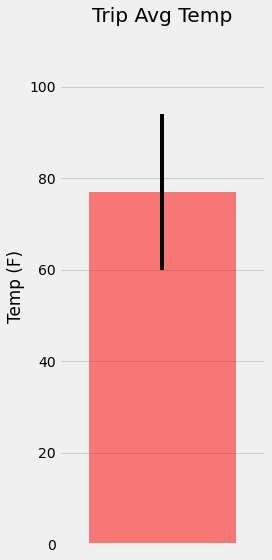

In [37]:
# ****
# Calculate the width and height for a figure with a specified aspect ratio. Make a figure twice as tall as it is wide
fig, ax = plt.subplots(figsize=plt.figaspect(2))
xpos = 1
yerr = tmax-tmin

#RGBA (red, green, blue, alpha) values should be within 0-1 range
bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='red', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)
# fig.autofmt_xdate()
fig.tight_layout()
fig.show()

In [38]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = '2012-01-01'
end_date = '2012-01-07'

sel = [Station_tbl.station,Station_tbl.name,Station_tbl.latitude,Station_tbl.longitude,Station_tbl.elevation, func.sum(Measurement_tbl.prcp)]

results = session.query(*sel).\
    filter(Measurement_tbl.station == Station_tbl.station).\
    filter(Measurement_tbl.date >= start_date).\
    filter(Measurement_tbl.date <= end_date).\
    group_by(Station_tbl.name).order_by(func.sum(Measurement_tbl.prcp).desc()).all()

print("Station \t Name \t\t\t\t\t  Latitude \t Longitude \t Elevation \t Rainfall")
print("------------------------------------------------------------------------------------------------------------------")

for (s,n,la,lo,el,r) in results: 
    print(s,"\t","{:<40}".format(n),la,"\t",round(lo,2),"\t",el,"\t\t",round(r,2))

Station 	 Name 					  Latitude 	 Longitude 	 Elevation 	 Rainfall
------------------------------------------------------------------------------------------------------------------
USC00516128 	 MANOA LYON ARBO 785.2, HI US             21.3331 	 -157.8 	 152.4 		 0.31
USC00519281 	 WAIHEE 837.5, HI US                      21.45167 	 -157.85 	 32.9 		 0.25
USC00518838 	 UPPER WAHIAWA 874.3, HI US               21.4992 	 -158.01 	 306.6 		 0.1
USC00513117 	 KANEOHE 838.1, HI US                     21.4234 	 -157.8 	 14.6 		 0.06
USC00519523 	 WAIMANALO EXPERIMENTAL FARM, HI US       21.33556 	 -157.71 	 19.5 		 0.0
USC00519397 	 WAIKIKI 717.2, HI US                     21.2716 	 -157.82 	 3.0 		 0.0
USC00517948 	 PEARL CITY, HI US                        21.3934 	 -157.98 	 11.9 		 0.0
USC00514830 	 KUALOA RANCH HEADQUARTERS 886.9, HI US   21.5213 	 -157.84 	 7.0 		 0.0
USC00511918 	 HONOLULU OBSERVATORY 702.2, HI US        21.3152 	 -158.0 	 0.9 		 0.0


In [39]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement_tbl.tobs), func.avg(Measurement_tbl.tobs), func.max(Measurement_tbl.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement_tbl.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [40]:
trip_start = '2018-01-01'
trip_end = '2018-01-07'

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(trip_start, trip_end, freq='D')

trip_dates

trip_month_day = trip_dates.strftime('%m-%d')

trip_month_day

Index(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07'], dtype='object')

In [41]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start = '2018-01-01'
trip_end = '2018-01-07'

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(trip_start, trip_end, freq='D')

# Stip off the year and save a list of %m-%d strings
trip_month_day = trip_dates.strftime('%m-%d')

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_month_day:
    normals.append(*daily_normals(date))
    
normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [42]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
df['date'] = trip_dates
df.set_index(['date'],inplace=True)
df.head()

,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


Text(0.4350000000000023, 0.5, 'Temperature')

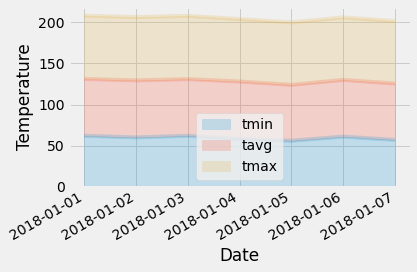

In [43]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind='area', stacked=True, x_compat=True, alpha=.2)
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Temperature")

Text(9.310000000000002, 0.5, 'Temperature')

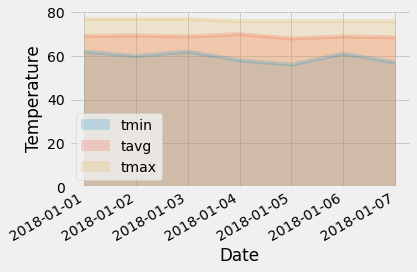

In [44]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind='area', stacked=False, x_compat=True, alpha=.2)
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Temperature")